Step 1: Import Required Libraries

Data manipulation (pandas, numpy)
Visualization(matplotlib,seaborn)
Machine Learning tasks like preprocessing, classification and evaluation(scikit-learn)
Dimensionality reduction(PCA)
Multiclass ROC and PR plotiing support(label_binarize,cycle)


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    matthews_corrcoef,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score
)
from sklearn.decomposition import PCA
from itertools import cycle


Step-2: Understand the Dataset

The dataset has 59 columns:
0: Date,
1: Time,
2: Label(Target Variable),
3: Temperature in Fahrenheit,
4 to 58: PIR sensor readings over a 4-second window


In [2]:


# Load the dataset
df = pd.read_csv("pirvision_office_dataset1.csv")  
  
df.head()


,Date,Time,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,...,PIR_46,PIR_47,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55
0,2024-08-08,19:19:56,0,86,10269,10721,11156,11170,10931,10671,...,11178,11197,11161,11096,10957,10839,10735,10590,10411,10329
1,2024-08-08,19:20:12,1,86,10364,10907,11299,11238,10867,10535,...,11122,11145,11136,11108,11041,10824,10645,10493,10398,10357
2,2024-08-08,19:20:28,0,86,10329,10793,11197,11242,11052,10658,...,11168,11204,11162,11109,11007,10867,10700,10533,10427,10265
3,2024-08-08,19:20:44,0,86,10169,10425,10822,11133,11136,10834,...,11116,11273,11186,10984,10910,10807,10714,10651,10562,10463
4,2024-08-08,19:21:00,0,86,10320,10667,11104,11234,11129,10814,...,11006,11257,11370,11173,10924,10816,10754,10588,10428,10407


Step 3: Data Cleaning
Drop the Date and Time columns, as they are not used for the prediction

In [3]:

df.drop(columns=df.columns[:2], inplace=True)



Step 4: Split the features and Labels

In [4]:

x = df.iloc[:, 1:]  # Features: Temperature + PIR readings
y = df.iloc[:, 0]   # Target: Activity label



Step 5: Train Test Split
Split the datset into training and tstting sets using 80:20 ratio

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

step 6: Map Class Labels

0: vacancy,
1: Stationary human presence
2: Other activity/motion

In [6]:

label_names = {
    0: "Vacancy",
    1: "Stationary human presence",
    3: "Other activity/motion"
}

In [7]:
df.head()

,Label,Temperature_F,PIR_1,PIR_2,PIR_3,PIR_4,PIR_5,PIR_6,PIR_7,PIR_8,...,PIR_46,PIR_47,PIR_48,PIR_49,PIR_50,PIR_51,PIR_52,PIR_53,PIR_54,PIR_55
0,0,86,10269,10721,11156,11170,10931,10671,10395,10133,...,11178,11197,11161,11096,10957,10839,10735,10590,10411,10329
1,1,86,10364,10907,11299,11238,10867,10535,10173,9950,...,11122,11145,11136,11108,11041,10824,10645,10493,10398,10357
2,0,86,10329,10793,11197,11242,11052,10658,10288,9988,...,11168,11204,11162,11109,11007,10867,10700,10533,10427,10265
3,0,86,10169,10425,10822,11133,11136,10834,10520,10228,...,11116,11273,11186,10984,10910,10807,10714,10651,10562,10463
4,0,86,10320,10667,11104,11234,11129,10814,10453,10040,...,11006,11257,11370,11173,10924,10816,10754,10588,10428,10407


Step 7: Normalize the Data

Normalize the features using StandardScaler: Fit on training set, Tranform both train and test sets this ensures all features contribute equally to the model



In [8]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Step 8: Visualize Class Distribution

Display a bar chart showing how many samples belong to each class in the training data that helps check for class imbalance

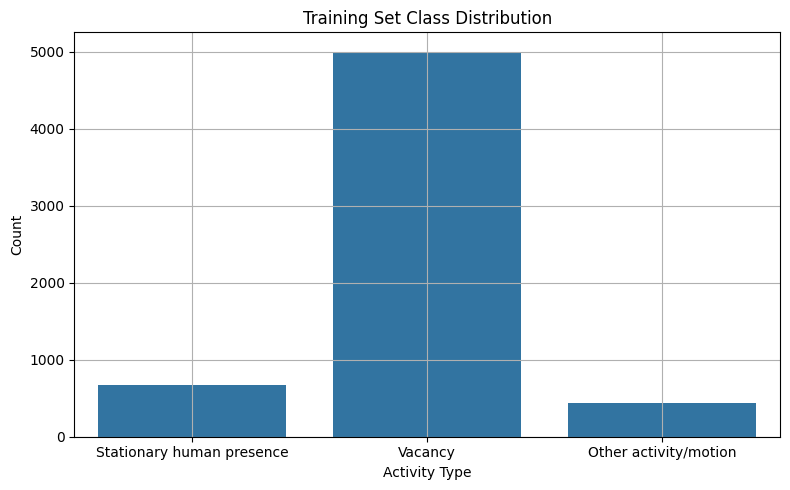

In [9]:

plt.figure(figsize=(8, 5))
sns.countplot(x=y_train.map(label_names))
plt.title("Training Set Class Distribution")
plt.xlabel("Activity Type")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

Step 9: Apply PCA for 2D Visualization

To convert the high-dimensional data into two dimensions, use Principal Component Analysis (PCA). This enables us to see how distinct the classes are from one another in the feature space.

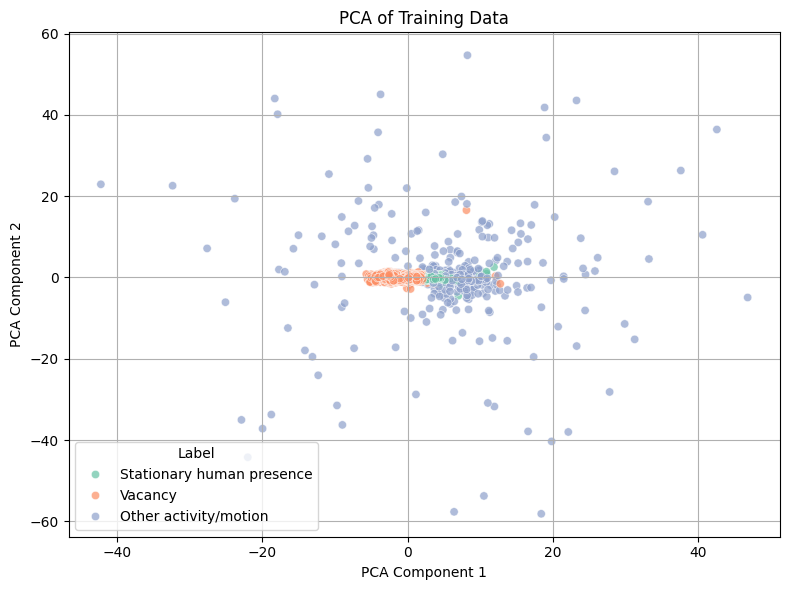

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=y_train.map(label_names),
    palette="Set2",
    alpha=0.7
)
plt.title("PCA of Training Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

Step 10: Training

Train a Random Forest Classifier, a robust ensemble method that performs well on structured/tabular data and it is chosen for its high accuracy, Built-in featutre importance amd Resistance to overfitting

In [11]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Step 11: Make Predictions
 Use the trained model to predict labels on the unseen test data 

In [12]:

y_pred = clf.predict(x_test_scaled)


Step 12: Accuracy

Accuracy is the percentage of correct predictions.It provides a brief indication of the model's performance.


In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f" Model Accuracy on Test Set: {accuracy * 100:.2f}%")

 Model Accuracy on Test Set: 99.28%


Step 13: Confusion Matrix 

The Confusion matrix shows:

True postives,False postives, False negatives
(It helps you evluate how well the classifier distinguish between each class.)

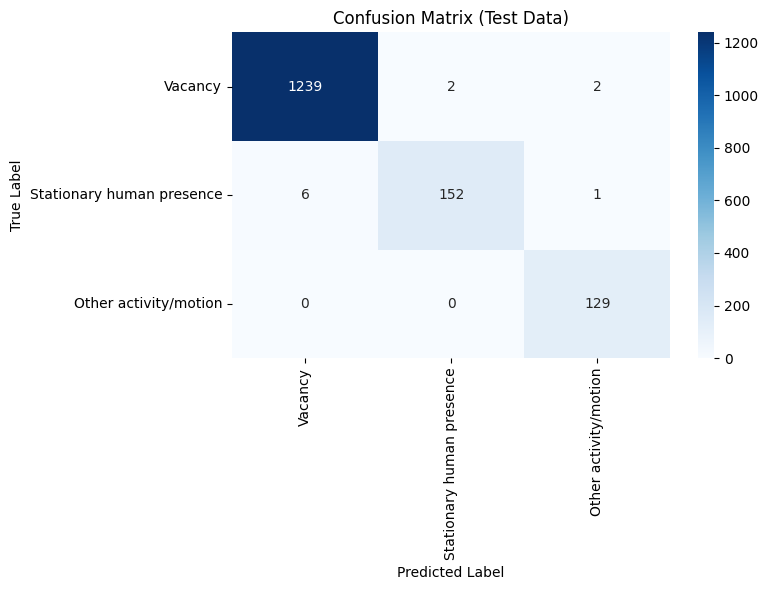

In [14]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=[label_names[i] for i in [0, 1, 3]],
    yticklabels=[label_names[i] for i in [0, 1, 3]]
)
plt.title("Confusion Matrix (Test Data)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

Step 14: Classification Report

It prints Precision, Recall, F1-score and Support for each class.

Precision: How many predicted are correct?
Recall: How many actuial positives were found?
F1-score: Balance between precision and recall

In [15]:

print("\n Classification Report (Test Data):")
print(classification_report(
    y_test,
    y_pred,
    target_names=[label_names[i] for i in [0, 1, 3]],
    digits=3
))


 Classification Report (Test Data):
                           precision    recall  f1-score   support

                  Vacancy      0.995     0.997     0.996      1243
Stationary human presence      0.987     0.956     0.971       159
    Other activity/motion      0.977     1.000     0.989       129

                 accuracy                          0.993      1531
                macro avg      0.986     0.984     0.985      1531
             weighted avg      0.993     0.993     0.993      1531



Step 15: Matthews Correlation Coeffiecient(MCC)

MCC is a multiclass classification metric that is balanced.  It functions effectively even in cases of class imbalance and takes into account every aspect of the confusion matrix.



In [16]:

mcc = matthews_corrcoef(y_test, y_pred)
print(f" Matthews Correlation Coefficient (MCC): {mcc:.3f}")




 Matthews Correlation Coefficient (MCC): 0.978


Step 16: ROC and PR Curve:

For each class-ROC curve shows the trade-off between TPR and FPR

We Binarize the multiclass labels, We use predict_proba() to get class probabilities and compute micro-average metrics for a global view




In [17]:

y_test_binarized = label_binarize(y_test, classes=[0, 1, 3])
n_classes = y_test_binarized.shape[1]
y_score = clf.predict_proba(x_test_scaled)

Step 17: Plot ROC Curves

A ROC curve with AUC (Area Under Curve) is generated for each class.  Performance in each class is summarized by the micro-average ROC curve.

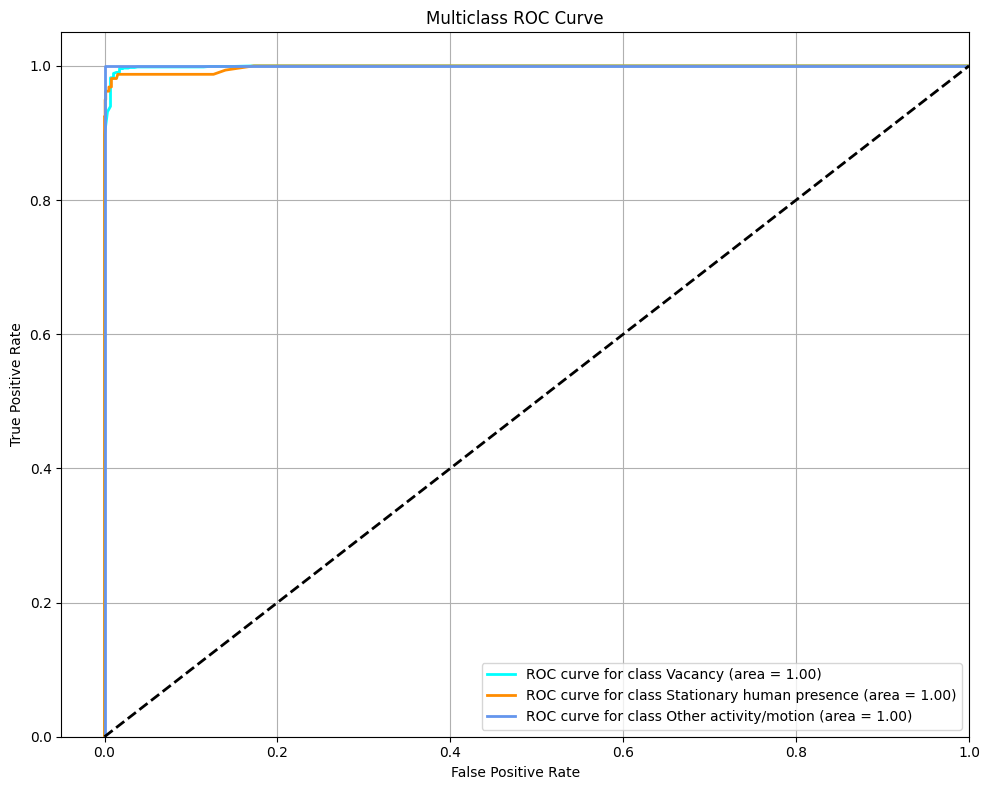

In [18]:

# Initialize dictionaries to store metrics for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
average_precision = dict()

# Compute ROC and Precision-Recall metrics for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

# Compute micro-average ROC and Precision-Recall metrics
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_binarized.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_binarized, y_score, average="micro")

# Using colors for plotting
colors = cycle(["aqua", "darkorange", "cornflowerblue"])

# Plot ROC Curves for each class
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for class {list(label_names.values())[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

Step 18: Plot Precison-Recall Curves

A Precision-Recall curve with Average Precision (AP) is assigned to each class.  A micro-average PR curve is also shown.

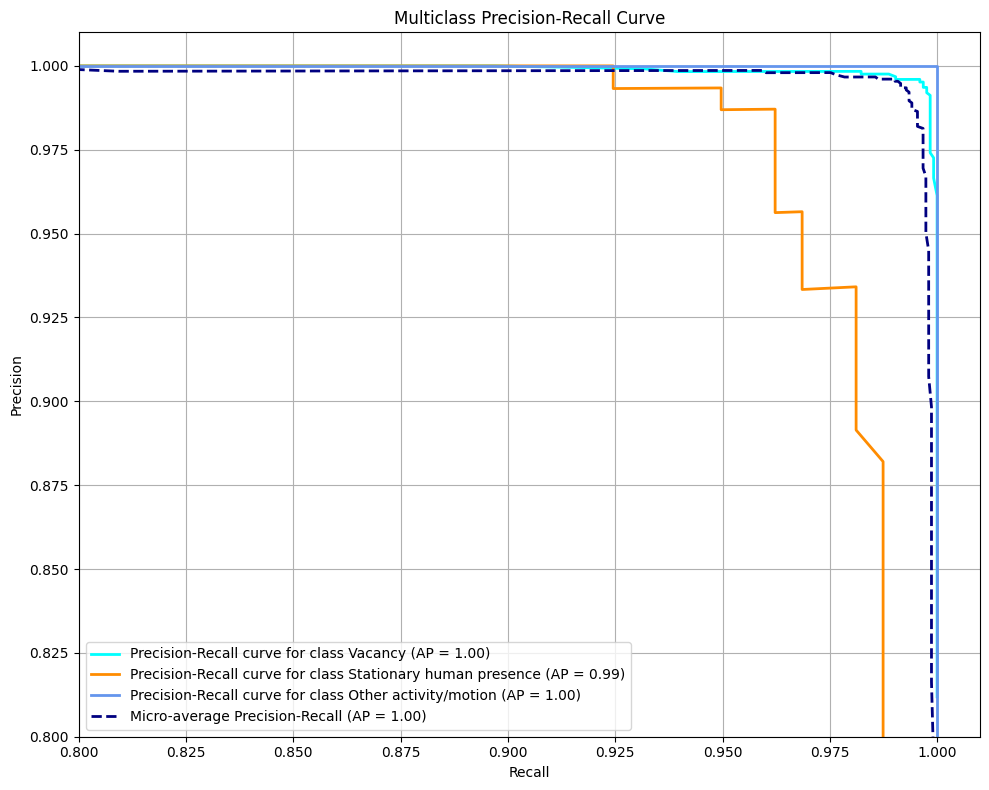

In [19]:


# Plot Precision-Recall Curves for each class including micro-average
plt.figure(figsize=(10, 8))

# Using  colors for individual classes
colors = cycle(["cyan", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Precision-Recall curve for class {list(label_names.values())[i]} (AP = {average_precision[i]:0.2f})')

# micro-average PR curve
plt.plot(recall["micro"], precision["micro"], color='navy', linestyle='--', lw=2,
         label=f'Micro-average Precision-Recall (AP = {average_precision["micro"]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.xlim([0.8, 1.01])
plt.ylim([0.8, 1.01])

plt.tight_layout()
plt.show()


Step 19: Save the model and scaler


In [20]:
import joblib
joblib.dump(clf, "pirison_random_forest_model.pkl")
joblib.dump(scaler,"pirvision_scaler.pkl")
print("The model has been saved successfully")

The model has been saved successfully
